In [1]:
#https://stackoverflow.com/questions/72090241/unable-to-resolve-import-error-from-pycarety
!pip install pycaret==2.3.10 markupsafe==2.0.1 pyyaml==5.4.1 -qq
!pip install scikit-learn==0.23.2
!pip uninstall matplotlib #https://stackoverflow.com/questions/64862818/cannot-import-name-png-from-matplotlib
!pip install matplotlib==3.1.3 #https://stackoverflow.com/questions/64862818/cannot-import-name-png-from-matplotlib
# !pip install autoviz #for EDA

     |████████████████████████████████| 11.2 MB 9.5 MB/s 
     |████████████████████████████████| 930 kB 42.6 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Found existing installation: matplotlib 3.5.2
Uninstalling matplotlib-3.5.2:
  Would remove:
    /usr/local/lib/python3.7/dist-packages/matplotlib-3.5.2-py3.7-nspkg.pth
    /usr/local/lib/python3.7/dist-packages/matplotlib-3.5.2.dist-info/*
    /usr/local/lib/python3.7/dist-packages/matplotlib/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/axes_grid/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/axes_grid1/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/axisartist/*
    /

#Import#
remove one outlier as from kmeans 

In [1]:
#LAURA

import numpy as np
import pandas as pd

# This mounts your Google Drive to the Colab VM.
from google.colab import drive
drive.mount('/content/drive')

# TODO: Enter the foldername in your Drive where you have saved the unzipped

import sys
sys.path.append('/content/drive/My Drive/CS229_Project')

data = pd.read_csv('/content/drive/MyDrive/CS229_Project/stanford_1kip.csv')
selection = data.iloc[:,2:] #took ID out
print(selection.shape)
selection.head(10)
selection = selection.drop(799) #remove outlier after kmeans
selection

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
(902, 176)


,iindex,CMV,GENDER,AGE,BMI,BCELLS_S1_IFNA,BCELLS_S1_IL10,BCELLS_S1_IL21,BCELLS_S1_IL6,BCELLS_S3_IFNA,...,EFF_CD4_TCELLS,EFF_CD8_TCELLS,EM_CD4_TCELLS,EM_CD8_TCELLS,LYMPHOCYTES,MONOCYTES,NAiVE_CD4_TCELLS,NAiVE_CD8_TCELLS,PLASMABLASTS,TRANSITIONALBCELLS
0,17.9,0.0,0,8.4,13.1,4.396549,2.574875,2.304368,0.873396,4.838583,...,6.250715,7.219390,10.863483,27.284169,97.389913,0.420141,39.595882,23.410242,1.590103,3.099810
1,17.3,0.0,0,8.4,13.1,5.315068,2.574875,2.304368,0.873396,5.297820,...,6.964785,9.464067,12.446345,27.590017,93.778321,5.192655,37.801647,22.640659,2.268747,2.570857
2,22.8,0.5,0,8.6,17.6,6.692845,2.574875,2.457365,0.873396,4.379347,...,3.037402,6.987181,5.615045,16.197171,96.417561,1.613269,51.013743,38.724947,1.062269,2.495292
3,11.8,0.0,0,9.8,14.5,1.181735,-0.236054,2.074874,2.240790,4.379347,...,1.490251,1.878604,0.866459,3.122160,75.303637,5.874443,58.353796,56.194483,2.268747,1.437385
4,10.8,0.0,0,9.8,15.6,0.722476,-0.236054,2.074874,2.240790,3.920110,...,1.728274,0.407953,0.949767,16.579481,89.333284,16.612600,57.619791,42.649820,2.494962,1.059561
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
897,-17.4,0.0,1,89.1,19.9,14.500250,2.574875,2.151372,0.873396,1.623927,...,29.457978,44.140472,26.608796,11.074214,66.413563,30.248355,3.466508,3.785873,0.534435,0.455043
898,-34.5,0.1,1,89.9,23.7,21.848397,6.791270,2.839856,10.445153,0.705453,...,2.204320,5.826141,3.615640,10.080207,92.111432,7.067571,17.657278,17.484452,0.685244,-0.149476
899,-14.8,1.0,1,90.0,18.4,16.796546,2.574875,2.533863,0.873396,0.705453,...,16.485713,27.189283,17.694783,27.437093,55.300971,52.065564,24.589551,5.632872,0.383625,0.455043
900,-16.1,1.0,1,90.0,20.2,1.640994,-0.938787,1.845379,0.189699,0.246217,...,2.680367,41.508780,22.443369,26.519548,85.860599,13.885449,6.810310,-3.140375,0.157410,0.908431


#Regression#
Status: works

In [ ]:
from pycaret.regression import *
s = setup(selection, target = 'BMI')

best = compare_models()
#print(best)

/usr/local/lib/python3.7/dist-packages/distributed/config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)


IntProgress(value=0, description='Processing: ', max=3)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,15:32:50
Status,. . . . . . . . . . . . . . . . . .,Preprocessing Data


Text(value="Following data types have been inferred automatically, if they are correct press enter to continue…

,Data Type
iindex,Numeric
CMV,Numeric
GENDER,Categorical
AGE,Numeric
BCELLS_S1_IFNA,Numeric
...,...
NAiVE_CD4_TCELLS,Numeric
NAiVE_CD8_TCELLS,Numeric
PLASMABLASTS,Numeric
TRANSITIONALBCELLS,Numeric


#Multiclass BMI#
Status: Works with matplotlib 3.1.3

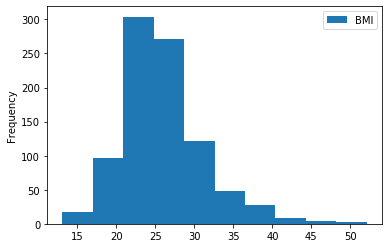

In [2]:
selection.plot(y='BMI', kind='hist')

In [3]:
#Add a new column with classes from BMI (4 classes)
#selection['BMI_multiclass'] = (1*((selection['BMI'] >= 18.5) & (selection['BMI'] < 25)).astype(int)) | (2*((selection['BMI'] > 25) & (selection['BMI'] <= 30)).astype(int)) | (3*((selection['BMI'] > 30)).astype(int))
#Add a new column with classes from BMI (7 classes)
#selection['BMI_multiclass'] = (1*((selection['BMI'] >= 18.5) & (selection['BMI'] < 22.5)).astype(int)) | (2*((selection['BMI'] > 22.5) & (selection['BMI'] <= 25)).astype(int)) | (3*((selection['BMI'] > 25) & (selection['BMI'] <= 28.5)).astype(int)) | (4*((selection['BMI'] > 28.5) & (selection['BMI'] <= 32.5)).astype(int)) | (5*((selection['BMI'] > 32.5) & (selection['BMI'] <= 37.5)).astype(int)) | (6*((selection['BMI'] > 37.5) & (selection['BMI'] <= 40)).astype(int)) | (7*((selection['BMI'] > 40)).astype(int))
#Add a new column with classes from BMI (3 classes)
selection['BMI_multiclass'] = (0*((selection['BMI'] >= 18)).astype(int)) | (1*((selection['BMI'] > 18) & (selection['BMI'] <= 30)).astype(int)) | (2*((selection['BMI'] > 30)).astype(int))
selection

#selection[['BMI', 'BMI_multiclass']]

from pycaret.classification import *
# #run new setup and compare models
s = setup(selection, target = 'BMI_multiclass', ignore_features = ['BMI'], fix_imbalance=True) #5June22 added fix imbalance

,Description,Value
0,session_id,8686
1,Target,BMI_multiclass
2,Target Type,Multiclass
3,Label Encoded,None
4,Original Data,"(901, 177)"
5,Missing Values,False
6,Numeric Features,174
7,Categorical Features,1
8,Ordinal Features,False
9,High Cardinality Features,False


In [4]:
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.8476,0.8537,0.6052,0.8407,0.8404,0.5014,0.5075,5.320
et,Extra Trees Classifier,0.8429,0.7479,0.5262,0.8299,0.8077,0.3514,0.4112,0.596
gbc,Gradient Boosting Classifier,0.8317,0.8241,0.6457,0.8318,0.8288,0.4774,0.4818,14.051
rf,Random Forest Classifier,0.8159,0.7852,0.4979,0.7846,0.7887,0.3006,0.3235,1.190
qda,Quadratic Discriminant Analysis,0.8016,0.5000,0.3333,0.6426,0.7133,0.0000,0.0000,0.081
lr,Logistic Regression,0.7762,0.8009,0.6680,0.8236,0.7897,0.4337,0.4508,1.458
dt,Decision Tree Classifier,0.7540,0.6685,0.5365,0.7754,0.7611,0.3174,0.3238,0.217
lda,Linear Discriminant Analysis,0.7222,0.7821,0.6723,0.8173,0.7504,0.3661,0.3946,0.098
ridge,Ridge Classifier,0.7111,0.0000,0.6713,0.8171,0.7411,0.3583,0.3897,0.053
knn,K Neighbors Classifier,0.6889,0.7787,0.7501,0.8169,0.7232,0.3496,0.3923,0.160


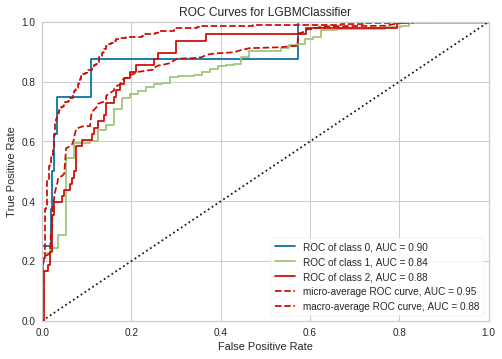

In [7]:
lgbm = create_model('lightgbm')
# launch evaluate widget
# plot model
plot_model(lgbm, plot = 'auc')
#plot_model(gbc, plot = 'feature')

In [ ]:
predictions = predict_model(lgbm, encoded_labels=True)

In [ ]:
#Add bmi column to test set

test_indexes = s[1][3][1].index #retrieve indexes from test set

bmi = []

for ind in test_indexes:
  bmi.append(selection.loc[ind, 'BMI'])

predictions['bmi'] = bmi
predictions

In [ ]:
# predictions[['BMI_multiclass', 'Label', 'Score']]
# predictions
predictions.to_csv('/content/drive/My Drive/CS229_Project/lgbm_model_predictions_1.4.csv')

In [ ]:
#!pip install shap
#!pip install explainerdashboard
!pip install deepchecks
deep_check(lgbm)

# Clustering #
Status: not able to run kmeans++ with cluster_n different from 4

In [ ]:
from pycaret.clustering import *
s = setup(selection, normalize = True)

In [ ]:
kmeans = create_model('kmeans', n_clusters=3)

In [ ]:
print(kmeans)

In [ ]:
evaluate_model(kmeans)

In [ ]:
result = assign_model(kmeans)

df = result
cluster_0 = df.loc[df['Cluster']=='Cluster 0', ['AGE','BMI']].mean(axis=0)
print('cluster 0')
print(cluster_0)
cluster_1 = df.loc[df['Cluster']=='Cluster 1', ['AGE','BMI']].mean(axis=0)
print('cluster 1')
print(cluster_1)
cluster_2 = df.loc[df['Cluster']=='Cluster 2', ['AGE','BMI']].mean(axis=0)
print('cluster 2')
print(cluster_2)
cluster_3 = df.loc[df['Cluster']=='Cluster 3', ['AGE','BMI']].mean(axis=0)
print('cluster 3')
print(cluster_3)

#EDA#
status: Doesnt work

In [ ]:
from pycaret.classification import *
%matplotlib inline

exp_name = setup(data = selection, target = 'BMI')

# launch eda
eda(display_format = 'svg')

#PCA#
status: not ready

In [ ]:
from pycaret.classification import *
%matplotlib inline

exp_name = setup(data = selection, pca=True, target = 'BMI')

In [ ]:
best = compare_models()
# # creating a model
# lr = create_model('lr')

# # plot model
# plot_model(lr, plot = 'auc')